# Libraries

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def reset_random_seeds():
  """
  Initialize random seeds for reproducibility
  """
  os.environ['PYTHONHASHSEED']=str(1)
  tf.random.set_seed(1)
  np.random.seed(1)
  random.seed(1)


def mape(actual, pred): 
  """
  Calculates MAPE 
  """
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100


# Loading Dataset

In [ ]:
file_directory = "./1_Input/housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(file_directory, delim_whitespace=True, names=names)
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Data Prep

In [ ]:
# features and target split
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Model architecture and training

In [ ]:
reset_random_seeds()

In [ ]:
# Architecture
n_cols = X.shape[1] # Number of entry variables

model = Sequential()
model.add(Dense(30, activation="relu", input_shape=(n_cols,)))
model.add(Dense(30, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
 # Training
early_stopping_monitor = EarlyStopping(patience = 3)

history = model.fit(X_train, y_train, 
          validation_split=0.2, 
          batch_size=15, # check how to define
          epochs=100,
          callbacks = [early_stopping_monitor]
          )

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 5169.9019 - val_loss: 1748.5785
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 1142.5315 - val_loss: 555.1230
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 363.9369 - val_loss: 224.6428
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 159.2893 - val_loss: 152.2277
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 97.6959 - val_loss: 115.4248
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 77.7355 - val_loss: 104.8113
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 69.7983 - val_loss: 98.0278
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 65.3594 - val_loss: 96.1512
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 62.3590 - val_loss: 88.8340
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 62.

In [ ]:
# EXPLAIN PARAMETERS

# Model testing and prediction

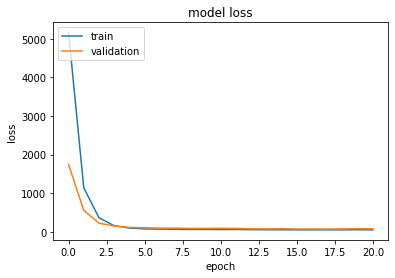

In [ ]:
# FINAL LOSS METRICS AND PLOT - MISSING

# summarize history for accuracy
plt.plot(history.history['loss'], label = "train")
plt.plot(history.history['val_loss'], label = "validation")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

# OBTAIN METRICS LIKE MAPE = MISSING

In [ ]:
mape(y_test, y_pred) 

49.351891794903345

Further exploration and analysis: 
- Hyperparameter tuning
- Compare to other techniques
- Explainability